<a href="https://colab.research.google.com/github/Pakhi27/AI-Engineer-Internship-Task/blob/main/AI_Engineer_Internship_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Processing

Data Ingestion Module

In [ ]:
import json
import pandas as pd

def load_data(file_path):
    if file_path.endswith('.csv'):
        return pd.read_csv(file_path)
    elif file_path.endswith('.json'):
        with open(file_path, 'r') as file:
            data = []
            for line in file:
                data.append(json.loads(line.strip()))
            return pd.DataFrame(data)
    elif file_path.endswith('.xlsx') or file_path.endswith('.xls'):
        return pd.read_excel(file_path)
    else:
        raise ValueError("Unsupported file format")

file_path="/content/olympics2024.csv - olympics2024.csv.csv"
df=load_data(file_path)
df.head()

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,US,40,44,42,126
1,2,China,CHN,40,27,24,91
2,3,Japan,JPN,20,12,13,45
3,4,Australia,AUS,18,19,16,53
4,5,France,FRA,16,26,22,64


Data Cleaning and Preprocessing

Data Exploration

In [ ]:
# Check data types and null values
print(df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          91 non-null     int64 
 1   Country       91 non-null     object
 2   Country Code  91 non-null     object
 3   Gold          91 non-null     int64 
 4   Silver        91 non-null     int64 
 5   Bronze        91 non-null     int64 
 6   Total         91 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 5.1+ KB
None


In [ ]:
# Summary statistics
print(df.describe())

            Rank       Gold     Silver     Bronze       Total
count  91.000000  91.000000  91.000000  91.000000   91.000000
mean   45.307692   3.604396   3.593407   4.219780   11.417582
std    25.652244   6.990278   6.770816   6.558798   19.702829
min     1.000000   0.000000   0.000000   0.000000    1.000000
25%    23.500000   0.000000   0.000000   1.000000    2.000000
50%    44.000000   1.000000   1.000000   2.000000    5.000000
75%    68.000000   3.000000   3.000000   5.000000    9.000000
max    84.000000  40.000000  44.000000  42.000000  126.000000


In [ ]:
# Check for duplicates
print(df.duplicated().sum())

0


In [ ]:
# Check for missing values
print(df.isnull().sum())

Rank            0
Country         0
Country Code    0
Gold            0
Silver          0
Bronze          0
Total           0
dtype: int64


Feature Engineering

Feature Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply encoding to categorical features
df['Country Code'] = label_encoder.fit_transform(df['Country Code'])
df.head()


,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,88,40,44,42,126
1,2,China,14,40,27,24,91
2,3,Japan,47,20,12,13,45
3,4,Australia,4,18,19,16,53
4,5,France,30,16,26,22,64


Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale numerical columns
scaler = StandardScaler()
df[['Gold', 'Silver', 'Bronze', 'Total']] = scaler.fit_transform(df[['Gold', 'Silver', 'Bronze', 'Total']])


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the min-max scaler
min_max_scaler = MinMaxScaler()

# Apply min-max scaling
df[['Gold', 'Silver', 'Bronze', 'Total']] = min_max_scaler.fit_transform(df[['Gold', 'Silver', 'Bronze', 'Total']])


Outlier Detection

In [ ]:
import numpy as np

# Example: Capping outliers
cap = df['Total'].quantile(0.95)
floor = df['Total'].quantile(0.05)
df['Total'] = np.clip(df['Total'], floor, cap)
df.head()

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,88,1.00,1.000000,1.000000,0.384
1,2,China,14,1.00,0.613636,0.571429,0.384
2,3,Japan,47,0.50,0.272727,0.309524,0.352
3,4,Australia,4,0.45,0.431818,0.380952,0.384
4,5,France,30,0.40,0.590909,0.523810,0.384


Data Splitting


In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(['Total','Country'],axis=1)
y = df['Total']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



Statistical/Machine Learning Algorithms

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
regressor=LinearRegression()

In [ ]:
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=regressor.predict(X_test)
y_pred

array([0.04735476, 0.05821862, 0.01153861, 0.01397515, 0.76725714,
       0.03116876, 0.01856766, 0.02891797, 0.1099875 , 0.04464003,
       0.01045844, 0.03193856, 0.0495565 , 0.00899984, 0.07262654,
       0.40203566, 0.04180613, 0.06188959, 0.02992095, 0.03985278,
       0.07027744, 0.05017205, 0.01158684, 0.04573462, 0.01976932,
       0.16615684, 0.02796552, 0.04878001])

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
r2=r2_score(y_test,y_pred)

In [ ]:
r2

0.33458792459315556

In [ ]:
dt_regressor=DecisionTreeRegressor()

In [ ]:
dt_regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred=dt_regressor.predict(X_test)
y_pred

array([0.088, 0.072, 0.008, 0.   , 0.368, 0.032, 0.024, 0.024, 0.264,
       0.04 , 0.   , 0.048, 0.056, 0.   , 0.056, 0.368, 0.048, 0.064,
       0.04 , 0.024, 0.072, 0.024, 0.   , 0.048, 0.024, 0.152, 0.024,
       0.024])

In [ ]:
r2=r2_score(y_test,y_pred)
r2

0.9178004275111694

In [ ]:
rf_regressor=RandomForestRegressor()

In [ ]:
rf_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred=rf_regressor.predict(X_test)

In [ ]:
y_pred

array([5.6000e-02, 6.1920e-02, 7.2800e-03, 1.6000e-04, 3.4216e-01,
       2.9600e-02, 1.9600e-02, 2.5680e-02, 2.1456e-01, 3.6800e-02,
       3.2000e-04, 3.9200e-02, 4.9440e-02, 5.6800e-03, 6.1840e-02,
       3.5800e-01, 4.6240e-02, 5.9600e-02, 2.7360e-02, 2.8880e-02,
       7.4640e-02, 3.6880e-02, 6.4000e-04, 4.7040e-02, 1.9600e-02,
       2.0008e-01, 2.5840e-02, 3.7520e-02])

In [ ]:
r2=r2_score(y_test,y_pred)
r2

0.9747507830059723

In [ ]:
import xgboost as xgb

In [ ]:
# Initialize the XGBoost Regressor
# n_estimators: The number of boosting rounds or trees to build. More trees usually improve performance but increase computational cost.
# learning_rate: How much each tree contributes to the final prediction. A lower learning rate requires more trees but can improve model performance.
# max_depth: The maximum depth of each tree. Deeper trees can model more complex relationships but may overfit the data.
xgb_model = xgb.XGBRegressor(
    n_estimators=100,      # Number of boosting rounds
    learning_rate=0.1,     # Step size shrinkage
    max_depth=3,           # Maximum depth of the trees
    random_state=42        # Seed for reproducibility
)


In [ ]:

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = xgb_model.predict(X_test)
y_pred

array([4.55023460e-02, 7.13611469e-02, 6.21230854e-03, 2.65821058e-04,
       3.37549120e-01, 3.24411355e-02, 1.79980621e-02, 2.54552029e-02,
       1.20449744e-01, 3.84540781e-02, 1.11666764e-03, 3.75632830e-02,
       4.60058413e-02, 3.11800302e-03, 6.97167069e-02, 3.67536187e-01,
       5.21170832e-02, 5.97744957e-02, 2.98486911e-02, 3.08189914e-02,
       8.26803073e-02, 5.03998697e-02, 7.23051664e-04, 4.74189669e-02,
       1.67890321e-02, 1.65498823e-01, 2.69927289e-02, 5.11467010e-02],
      dtype=float32)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.00017467368028554838


In [ ]:
r2=r2_score(y_test,y_pred)
r2

0.9803697826344415

In [ ]:
# Feature importance
importances = xgb_model.feature_importances_
print(f'Feature Importances: {importances}')

Feature Importances: [0.00075118 0.59051025 0.28126577 0.12747279]


Clustering

K-means Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


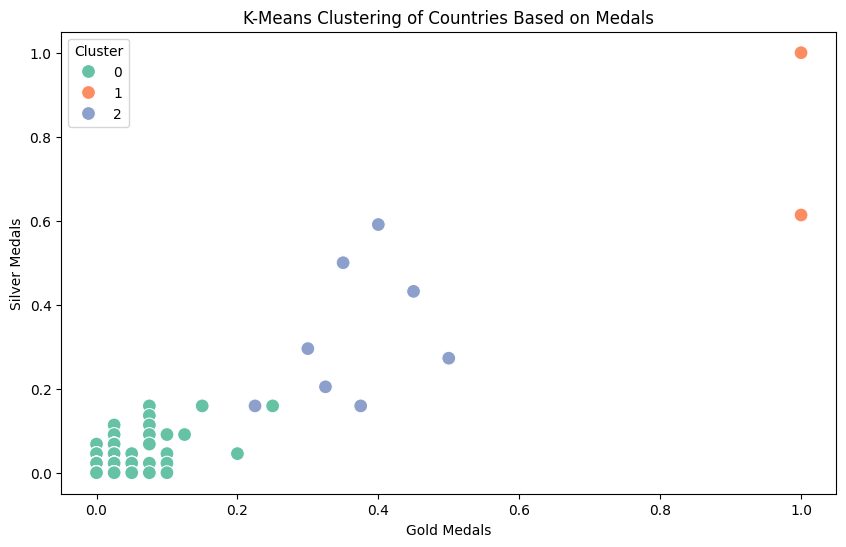

In [ ]:
X = df[['Gold', 'Silver', 'Bronze']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize KMeans and fit to the data
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Gold', y='Silver', hue='Cluster', palette='Set2', s=100)
plt.title('K-Means Clustering of Countries Based on Medals')
plt.xlabel('Gold Medals')
plt.ylabel('Silver Medals')
plt.legend(title='Cluster')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


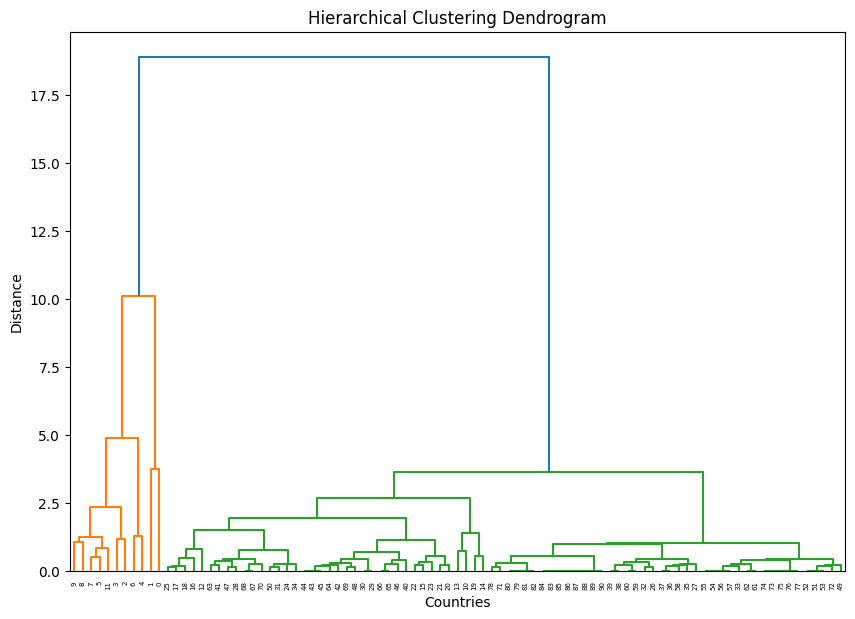

In [ ]:
# Compute the linkage matrix
linked = linkage(X_scaled, method='ward')  # Use 'ward' method for minimizing variance within clusters

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Distance')
plt.show()

# Form clusters
df['Hierarchical_Cluster'] = fcluster(linked, t=3, criterion='maxclust')  # Adjust t based on the desired number of clusters

Report Generation

Exploratory Data Analysis-(Visualization)

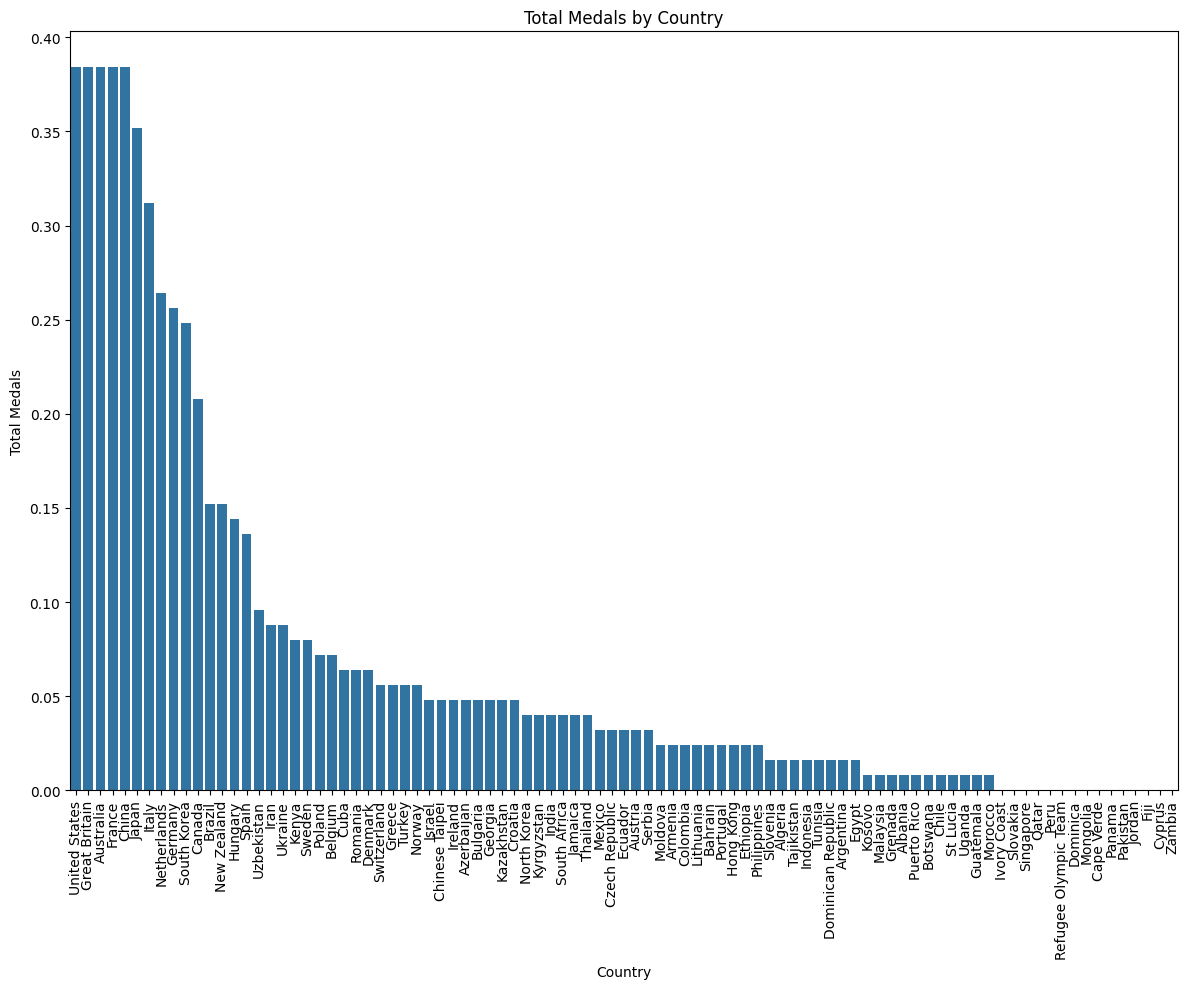

In [ ]:


# Example analysis: Basic statistics
summary_stats = df.describe()

# Example visualization: Distribution of medals
plt.figure(figsize=(12, 10))
sns.barplot(x='Country', y='Total', data=df.sort_values('Total', ascending=False))
plt.xticks(rotation=90)
plt.title('Total Medals by Country')
plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.tight_layout()
plt.savefig('total_medals_by_country.png')


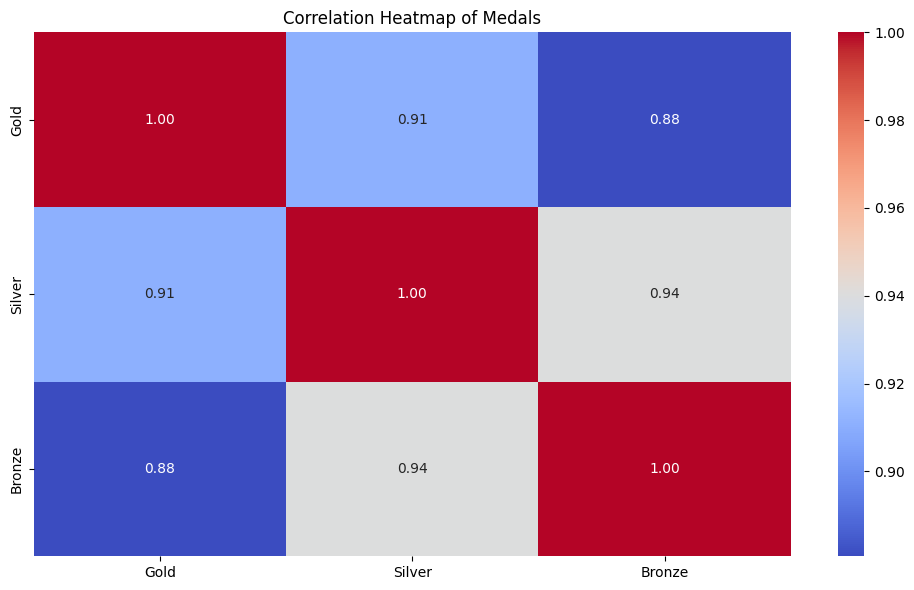

In [ ]:

# Example visualization: Medal distribution
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Gold', 'Silver', 'Bronze']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Medals')
plt.tight_layout()
plt.savefig('medal_correlation_heatmap.png')

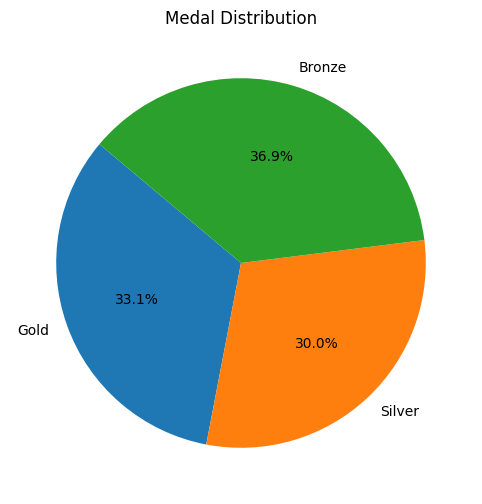

In [ ]:
# Pie Chart
plt.figure(figsize=(8, 6))
sizes = df[['Gold', 'Silver', 'Bronze']].sum()
labels = sizes.index
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Medal Distribution')
plt.savefig('medal_distribution_pie_chart.png')
plt.show()


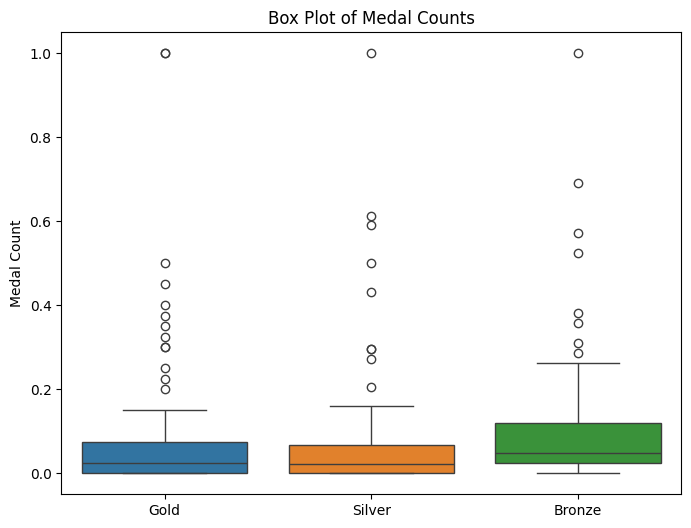

In [ ]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Gold', 'Silver', 'Bronze']])
plt.title('Box Plot of Medal Counts')
plt.ylabel('Medal Count')
plt.savefig('box_plot_medals.png')
plt.show()


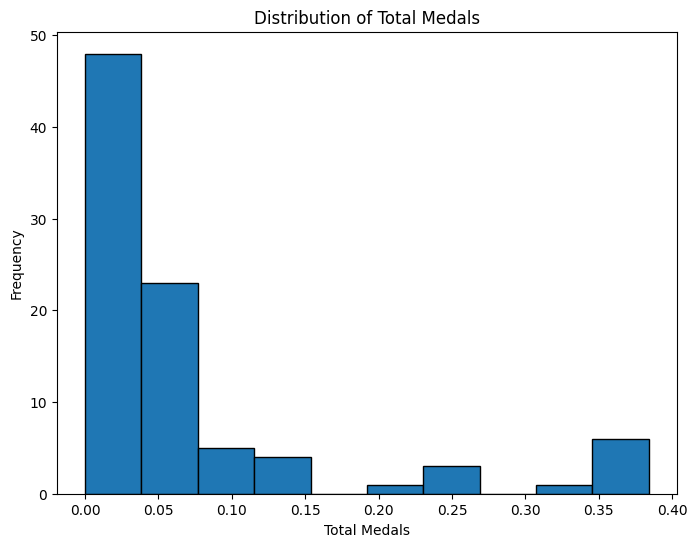

In [ ]:
#  Histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Total'], bins=10, edgecolor='black')
plt.title('Distribution of Total Medals')
plt.xlabel('Total Medals')
plt.ylabel('Frequency')
plt.savefig('histogram_total_medals.png')
plt.show()


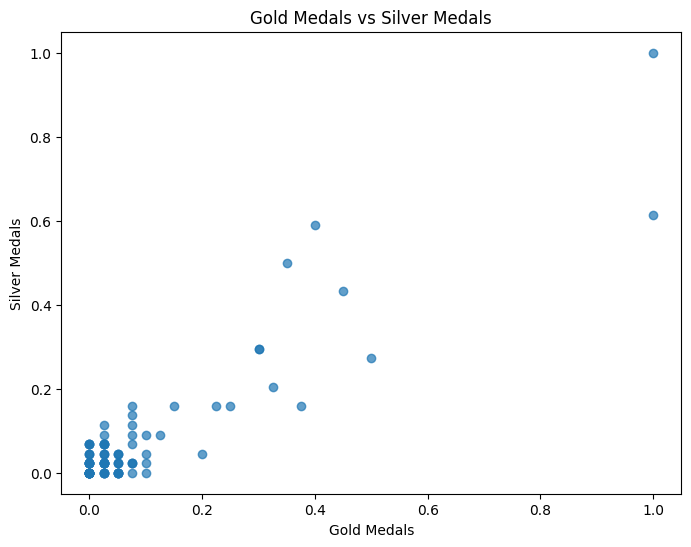

In [ ]:
#  Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Gold'], df['Silver'], alpha=0.7)
plt.title('Gold Medals vs Silver Medals')
plt.xlabel('Gold Medals')
plt.ylabel('Silver Medals')
plt.savefig('scatter_gold_vs_silver.png')
plt.show()


<Figure size 1000x800 with 0 Axes>

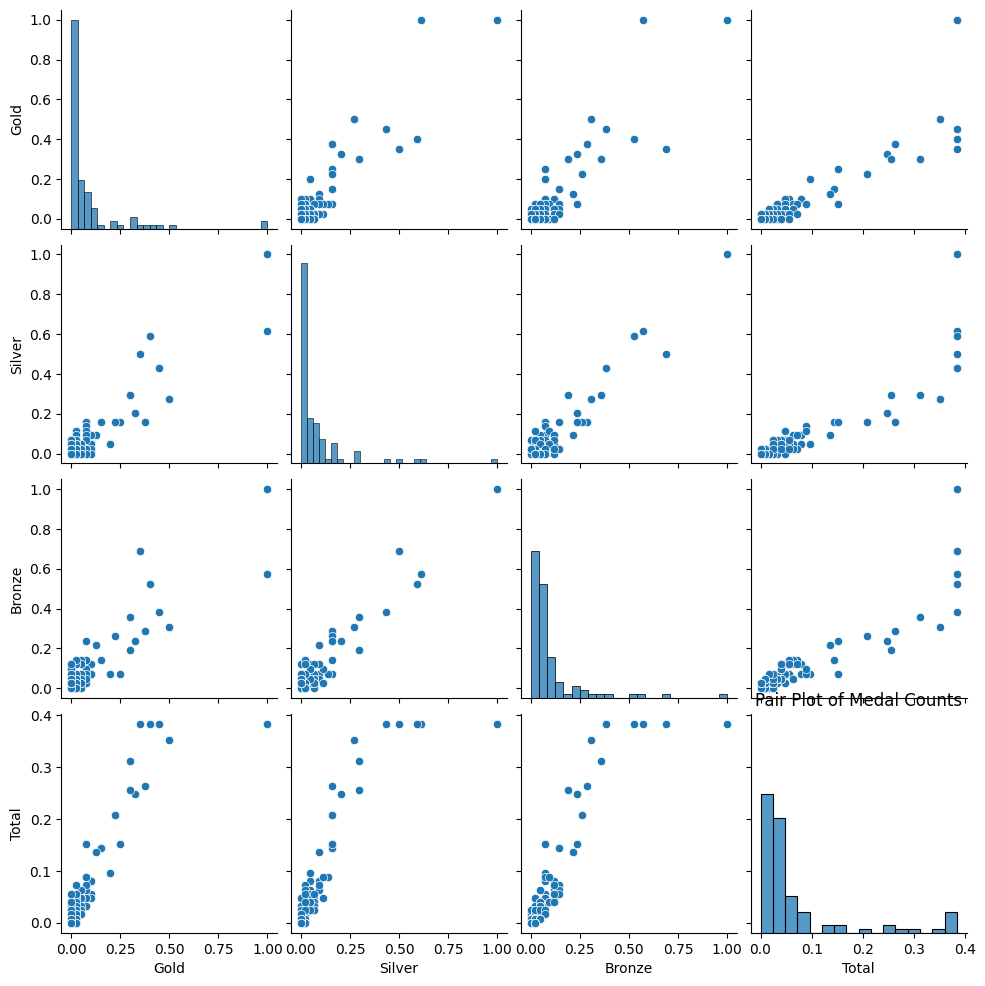

In [ ]:
#  Pair Plot
plt.figure(figsize=(10, 8))
sns.pairplot(df[['Gold', 'Silver', 'Bronze', 'Total']])
plt.title('Pair Plot of Medal Counts')
plt.savefig('pair_plot_medals.png')
plt.show()


 Generate a Report

In [ ]:
!pip install python-docx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 3.9 MB/s eta 0:00:00


In [ ]:
from docx import Document
from docx.shared import Inches

# Create a new Document
doc = Document()
doc.add_heading('Olympics Data Analysis Report', 0)

# Add a summary
doc.add_heading('Summary', level=1)
doc.add_paragraph(
    "This report provides a detailed analysis of the medal counts for various countries in the Olympics dataset. "
    "The visualizations included in this report offer insights into different aspects of the data:"
    "\n\n"
    "1. Total Medals by Country: This line plot shows the distribution of total medals among the top countries, "
    "highlighting the countries with the highest and lowest medal counts."
    "\n\n"
    "2. Medal Correlation Heatmap: The heatmap illustrates the correlation between the number of Gold, Silver, and Bronze medals. "
    "It helps in understanding the relationships and dependencies between different types of medals."
    "\n\n"
    "3. Medal Distribution Pie Chart: This pie chart represents the distribution of different types of medals across all countries. "
    "It provides a visual summary of how medals are distributed among Gold, Silver, and Bronze categories."
    "\n\n"
    "4. Box Plot of Medal Counts: The box plot offers a view of the distribution of medal counts for Gold, Silver, and Bronze. "
    "It highlights the median, quartiles, and potential outliers in the dataset."
    "\n\n"
    "5. Histogram of Total Medals: This histogram shows the frequency distribution of total medals across the countries, "
    "giving an overview of how total medals are distributed."
    "\n\n"
    "6. Scatter Plot of Gold vs Silver Medals: The scatter plot visualizes the relationship between Gold and Silver medals. "
    "It helps in understanding whether there is a trend or pattern between these two medal categories."
    "\n\n"
    "7. Pair Plot of Medal Counts: The pair plot provides a matrix of scatter plots for Gold, Silver, Bronze, and Total medals. "
    "It helps in identifying relationships and correlations between all pairs of medal types."
)



# Add statistical summary
doc.add_heading('Summary Statistics', level=1)
doc.add_paragraph(
    "Here are the summary statistics of the dataset:"
)
doc.add_paragraph(summary_stats.to_string())

# Add visualizations
doc.add_heading('Visualizations', level=1)

# Add Total Medals by Country chart
doc.add_paragraph('Figure 1: Total Medals by Country')
doc.add_picture('total_medals_by_country.png', width=Inches(6))

# Add Medal Correlation Heatmap
doc.add_paragraph('Figure 2: Medal Correlation Heatmap')
doc.add_picture('medal_correlation_heatmap.png', width=Inches(6))

# Add Pie Chart
doc.add_paragraph('Figure 1: Medal Distribution Pie Chart')
doc.add_picture('medal_distribution_pie_chart.png', width=Inches(6))

# Add Box Plot
doc.add_paragraph('Figure 2: Box Plot of Medal Counts')
doc.add_picture('box_plot_medals.png', width=Inches(6))

# Add Histogram
doc.add_paragraph('Figure 3: Histogram of Total Medals')
doc.add_picture('histogram_total_medals.png', width=Inches(6))

# Add Scatter Plot
doc.add_paragraph('Figure 4: Scatter Plot of Gold vs Silver Medals')
doc.add_picture('scatter_gold_vs_silver.png', width=Inches(6))


# Add Pair Plot
doc.add_paragraph('Figure 6: Pair Plot of Medal Counts')
doc.add_picture('pair_plot_medals.png', width=Inches(6))


# Save the document
doc.save('Olympics_Data_Analysis_Report.docx')


User Interaction

Command Line Interface(CLI)

In [ ]:
# A simple command-line interface for users to interact with the AI employee

In [ ]:
import argparse

In [ ]:
# Create a simple CLI
# Uses argparse to parse command-line arguments.
# --action specifies whether to analyze or generate a report.
# --query contains the user’s query for analysis.

def create_cli():
    parser = argparse.ArgumentParser(description="AI Employee Data Analysis")
    parser.add_argument('--action', type=str, help="Action to perform: analyze or report", required=True)
    parser.add_argument('--query', type=str, help="Query for data analysis")
    args = parser.parse_args()
    return args

Natural Language Processing(NLP)

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Basic NLP processing
# Tokenizes the query and removes stopwords.
# Matches tokens to predefined categories to determine what action to take.
def process_query(query):
#  Loads a set of common English stop words (words like 'the', 'is', 'in', etc.) that are typically removed from text to focus on meaningful words.
    stop_words = set(stopwords.words('english'))
#  Tokenizes the input query into individual words (tokens) and converts the query to lowercase for uniformity.
    tokens = word_tokenize(query.lower())
#  Filters out non-alphanumeric words (e.g., punctuation) and stop words, leaving only the relevant words in the query.
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

# Simple query processing:-

# If both keywords are present, the function returns 'total_medals', indicating that the user is asking about the total medals by country.
    if 'total' in filtered_tokens and 'medals' in filtered_tokens:
        return 'total_medals'

# If the keyword is present, the function returns 'medal_correlation', indicating an interest in the correlation between different types of medals.
    elif 'correlation' in filtered_tokens:
        return 'medal_correlation'

# If the keyword is present, it returns 'medal_distribution', indicating a query about the distribution of medals.
    elif 'distribution' in filtered_tokens:
        return 'medal_distribution'

# If both keywords are present, it returns 'box_plot', suggesting a request for the box plot of medal counts.
    elif 'box' in filtered_tokens and 'plot' in filtered_tokens:
        return 'box_plot'

# If the keyword is present, it returns 'histogram', indicating a query about the histogram of total medals.
    elif 'histogram' in filtered_tokens:
        return 'histogram'

# If the keyword is present, it returns 'scatter_plot', implying an interest in the scatter plot of gold vs. silver medals.
    elif 'scatter' in filtered_tokens:
        return 'scatter_plot'

# If the keyword is present, it returns 'pair_plot', indicating a request for the pair plot of medal counts.
    elif 'pair' in filtered_tokens:
        return 'pair_plot'

# If none of the keywords are found, the function returns 'unknown', indicating that the query could not be recognized.
    else:
        return 'unknown'

In [ ]:
# Perform actions based on the CLI input
# Based on the action and query, the appropriate data analysis or report generation code is executed.
def perform_action(action, query):
    if action == 'analyze':
        result = process_query(query)
        if result == 'total_medals':
            print("Displaying total medals by country...")
            # Your plotting code for total medals
            plt.figure(figsize=(12, 10))
            sns.barplot(x='Country', y='Total', data=df.sort_values('Total', ascending=False))
            plt.xticks(rotation=90)
            plt.title('Total Medals by Country')
            plt.xlabel('Country')
            plt.ylabel('Total Medals')
            plt.tight_layout()
            plt.savefig('total_medals_by_country.png')
        elif result == 'medal_correlation':
            print("Displaying medal correlation heatmap...")
            # Your plotting code for medal correlation
            plt.figure(figsize=(10, 6))
            sns.heatmap(df[['Gold', 'Silver', 'Bronze']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
            plt.title('Correlation Heatmap of Medals')
            plt.tight_layout()
            plt.savefig('medal_correlation_heatmap.png')

        elif result == 'medal_distribution':
            print("Displaying medal distribution pie chart...")
            # Your plotting code for medal distribution
            plt.figure(figsize=(8, 6))
            sizes = df[['Gold', 'Silver', 'Bronze']].sum()
            labels = sizes.index
            plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
            plt.title('Medal Distribution')
            plt.savefig('medal_distribution_pie_chart.png')
            plt.show()
        elif result == 'box_plot':
            print("Displaying box plot of medal counts...")
            # Your plotting code for box plot
            plt.figure(figsize=(8, 6))
            sns.boxplot(data=df[['Gold', 'Silver', 'Bronze']])
            plt.title('Box Plot of Medal Counts')
            plt.ylabel('Medal Count')
            plt.savefig('box_plot_medals.png')
            plt.show()
        elif result == 'histogram':
            print("Displaying histogram of total medals...")
            # Your plotting code for histogram
            plt.figure(figsize=(8, 6))
            plt.hist(df['Total'], bins=10, edgecolor='black')
            plt.title('Distribution of Total Medals')
            plt.xlabel('Total Medals')
            plt.ylabel('Frequency')
            plt.savefig('histogram_total_medals.png')
            plt.show()
        elif result == 'scatter_plot':
            print("Displaying scatter plot of Gold vs Silver medals...")
            # Your plotting code for scatter plot
            plt.figure(figsize=(8, 6))
            plt.scatter(df['Gold'], df['Silver'], alpha=0.7)
            plt.title('Gold Medals vs Silver Medals')
            plt.xlabel('Gold Medals')
            plt.ylabel('Silver Medals')
            plt.savefig('scatter_gold_vs_silver.png')
            plt.show()

        elif result == 'pair_plot':
            print("Displaying pair plot of medal counts...")
            # Your plotting code for pair plot
            plt.figure(figsize=(10, 8))
            sns.pairplot(df[['Gold', 'Silver', 'Bronze', 'Total']])
            plt.title('Pair Plot of Medal Counts')
            plt.savefig('pair_plot_medals.png')
            plt.show()
        else:
            print("Query not recognized. Please try again.")
    elif action == 'report':
        print("Generating report...")
        # Your report generation code
        from docx import Document
        from docx.shared import Inches

# Create a new Document
        doc = Document()
        doc.add_heading('Olympics Data Analysis Report', 0)

# Add a summary
        doc.add_heading('Summary', level=1)
        doc.add_paragraph(
         "This report provides a detailed analysis of the medal counts for various countries in the Olympics dataset. "
         "The visualizations included in this report offer insights into different aspects of the data:"
         "\n\n"
         "1. Total Medals by Country: This line plot shows the distribution of total medals among the top countries, "
        "highlighting the countries with the highest and lowest medal counts."
         "\n\n"
        "2. Medal Correlation Heatmap: The heatmap illustrates the correlation between the number of Gold, Silver, and Bronze medals. "
        "It helps in understanding the relationships and dependencies between different types of medals."
        "\n\n"
        "3. Medal Distribution Pie Chart: This pie chart represents the distribution of different types of medals across all countries. "
        "It provides a visual summary of how medals are distributed among Gold, Silver, and Bronze categories."
        "\n\n"
        "4. Box Plot of Medal Counts: The box plot offers a view of the distribution of medal counts for Gold, Silver, and Bronze. "
        "It highlights the median, quartiles, and potential outliers in the dataset."
        "\n\n"
        "5. Histogram of Total Medals: This histogram shows the frequency distribution of total medals across the countries, "
        "giving an overview of how total medals are distributed."
         "\n\n"
        "6. Scatter Plot of Gold vs Silver Medals: The scatter plot visualizes the relationship between Gold and Silver medals. "
        "It helps in understanding whether there is a trend or pattern between these two medal categories."
        "\n\n"
        "7. Pair Plot of Medal Counts: The pair plot provides a matrix of scatter plots for Gold, Silver, Bronze, and Total medals. "
        "It helps in identifying relationships and correlations between all pairs of medal types."
     )

# Add statistical summary
        doc.add_heading('Summary Statistics', level=1)
        doc.add_paragraph(
    "Here are the summary statistics of the dataset:"
)
        doc.add_paragraph(summary_stats.to_string())

# Add visualizations
        doc.add_heading('Visualizations', level=1)

# Add Total Medals by Country chart
        doc.add_paragraph('Figure 1: Total Medals by Country')
        doc.add_picture('total_medals_by_country.png', width=Inches(6))

# Add Medal Correlation Heatmap
        doc.add_paragraph('Figure 2: Medal Correlation Heatmap')
        doc.add_picture('medal_correlation_heatmap.png', width=Inches(6))

# Add Pie Chart
        doc.add_paragraph('Figure 1: Medal Distribution Pie Chart')
        doc.add_picture('medal_distribution_pie_chart.png', width=Inches(6))

# Add Box Plot
        doc.add_paragraph('Figure 2: Box Plot of Medal Counts')
        doc.add_picture('box_plot_medals.png', width=Inches(6))

# Add Histogram
        doc.add_paragraph('Figure 3: Histogram of Total Medals')
        doc.add_picture('histogram_total_medals.png', width=Inches(6))

# Add Scatter Plot
        doc.add_paragraph('Figure 4: Scatter Plot of Gold vs Silver Medals')
        doc.add_picture('scatter_gold_vs_silver.png', width=Inches(6))


# Add Pair Plot
        doc.add_paragraph('Figure 6: Pair Plot of Medal Counts')
        doc.add_picture('pair_plot_medals.png', width=Inches(6))


# Save the document
        doc.save('Olympics_Data_Analysis_Report.docx')

    else:
        print("Invalid action. Please use 'analyze' or 'report'.")


In [ ]:
ls /content/


 box_plot_medals.png                        Olympics_Data_Analysis_Report.docx
 histogram_total_medals.png                 pair_plot_medals.png
 medal_correlation_heatmap.png              sample_data/
 medal_distribution_pie_chart.png           scatter_gold_vs_silver.png
'olympics2024.csv - olympics2024.csv.csv'   total_medals_by_country.png


In [ ]:
import os

# Print current working directory
print(os.getcwd())

# List files in the current directory
print(os.listdir())


/content
['.config', 'box_plot_medals.png', 'histogram_total_medals.png', 'Olympics_Data_Analysis_Report.docx', 'scatter_gold_vs_silver.png', 'pair_plot_medals.png', 'medal_correlation_heatmap.png', 'olympics2024.csv - olympics2024.csv.csv', 'medal_distribution_pie_chart.png', 'total_medals_by_country.png', 'sample_data']


Displaying total medals by country...


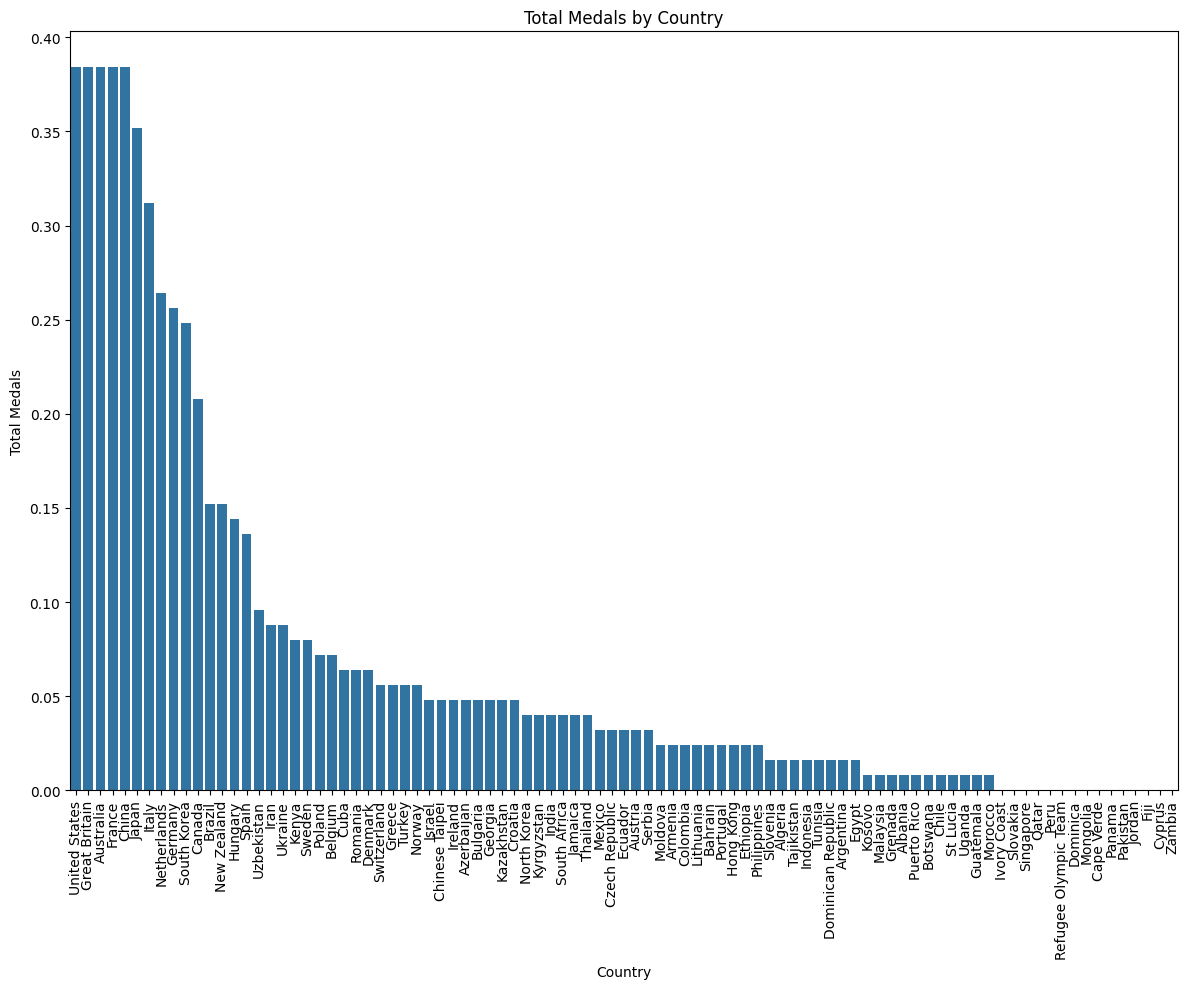

In [ ]:
perform_action('analyze', 'total medals')

